# Multi-arm Bandit Problem

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

10-armed testbed: set of 2000 randomly generated n-armed bandit tasks with n = 10 <br> <br>
For each bandit, the action values, q(a), a = 1, . . . , 10, were selected according to a normal (Gaussian) distribution with mean 0 and variance 1. <br> <br>
On t th time step with a given bandit, the actual reward R_t was the q(A_t) for the bandit (where A_t was the action selected) plus a normally distributed noise term that was mean 0 and variance 1.

In [2]:
def bandit_action_values(num_actions = 10):
    #number of actions: num_actions
    values = np.random.normal(0, 1, num_actions)
    return values

In [3]:
bandit_action_values(num_actions = 10)

array([-0.13774472,  1.26464942, -1.17355313,  0.993246  , -0.80995663,
       -0.36091126,  0.58909816, -0.49428568,  1.4997875 , -0.05298104])

In [4]:
np.mean(bandit_action_values(num_actions = 10))

0.026811370811937973

In [5]:
def bandit_reward_for_action(action):
    q = bandit_action_values(num_actions = 10)
    Q = q[action - 1] + np.random.normal(0, 1, 1)
    return Q

In [6]:
bandit_reward_for_action(action = 0)

array([-1.97461413])

In [7]:
class Bandit:

    def __init__(self, num_actions):
        self.num_actions = num_actions
        self.values = self.bandit_action_values()
        #print("The bandit action values: ", self.values)

    def bandit_action_values(self):
        values = np.random.normal(0, 1, self.num_actions)
        return values

    def reward_for_action(self, action):

        try:
            Q = self.values[action] + np.random.normal(0, 1, 1)

        except:
            print("INVALID ACTION!")
            return

        return Q


In [8]:
bandit = Bandit(3)

In [9]:
bandit.num_actions

3

In [10]:
bandit.values

array([-0.0377752 , -0.67192332,  1.90614529])

In [11]:
bandit.reward_for_action(action=1)

array([-1.64407358])

In [12]:
def value_estimate(num_iter, action):
    sum = 0
    for i in range(0, num_iter):
        sum += bandit.reward_for_action(action=action)
    value_estimate =  sum / num_iter
    return value_estimate

In [13]:
value_estimate(num_iter = 1000, action = 0)

array([-0.03006019])

In [14]:
value_estimate(num_iter = 1000, action = 1)

array([-0.61399184])

In [15]:
value_estimate(num_iter = 1000, action = 2)

array([1.87961736])

In [16]:
class Player:

    def __init__(self, num_plays, Bandit, exploration_percent, start_iter):
        self.num_plays = num_plays
        self.Bandit = Bandit
        self.exploration_percent = exploration_percent
        self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)
        self.num_action_selected = np.zeros_like(self.Bandit.values)
        self.action = None
        self.reward = 0
        self.start_iter =start_iter
        self.avg_reward = 0

    def update_action_value_estimates(self):
        value_estimates = self.value_estimates[self.action] + (self.reward - self.value_estimates[self.action])/self.num_action_selected[self.action]
        self.value_estimates[self.action] = value_estimates
        return

    def pull_bandit_lever_once(self):

        num = np.random.uniform(0,1)

        if num < self.exploration_percent:
            #Exploration ---> choose an action randomly without considering the value estimates
            self.action = np.random.randint(0, self.Bandit.num_actions)

        else:
            #Exploitation ---> Choose a greedy action arbitrarily
            if np.min(self.num_action_selected) < self.start_iter:
                #print("MINIMUM NUMBER OF ITERATIONS NOT REACHED FOR ALL ACTIONS")
                action = np.where(self.num_action_selected == np.min(self.num_action_selected))[0]
                self.action = action[0]

            else:
                #print("MINIMUM NUMBER OF ITERATIONS REACHED FOR ALL ACTIONS")
                self.action = np.argmax(self.value_estimates, axis = 0)

        self.reward = self.Bandit.reward_for_action(action = self.action)[0]
        self.num_action_selected[self.action] += 1
        return 

    def play_game(self):

        for _ in range(0,self.num_plays):
            self.pull_bandit_lever_once()
            self.update_action_value_estimates()
            self.avg_reward += self.reward
            #print("Reward for action {} is {}".format(self.action, self.reward))
        self.avg_reward = self.avg_reward/(self.num_plays+1)
        #print( "Average reward is {}".format(self.avg_reward))
        #print("The bandit action value:", self.Bandit.values[self.action])


In [17]:
player = Player(10000, bandit, 0.01, 0)
print("True value estimates: ", bandit.values)

True value estimates:  [-0.0377752  -0.67192332  1.90614529]


/tmp/ipykernel_14974/1832779577.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


In [18]:
print("ONE GAME")

player.pull_bandit_lever_once()
print("Action selected: ", player.action )
print("Reward collected: ", player.reward)
player.update_action_value_estimates()
print("Updated value estimates: ", player.value_estimates)

ONE GAME
Action selected:  0
Reward collected:  0.5527384187343266
Updated value estimates:  [0.55273842 0.         0.        ]


In [19]:
player.play_game()

In [20]:
print("Updated value estimates: ", player.value_estimates)

Updated value estimates:  [ 0.1358346  -0.53548769  1.90425254]


# Average Reward

In [21]:
def average_reward_plot(num_bandits = 2000, num_steps = 1000, epsilon = 0.01):

    plt.figure()
    
    for eps in epsilon:
        avg_step_reward = []
        for step in range(0, num_steps):
            reward = []
            for _ in range(0,num_bandits):
                new_bandit = Bandit(10)
                new_player = Player(step, new_bandit, eps, 0)
                new_player.play_game()
                #print("Average reward: ", new_player.avg_reward)
                reward.append(new_player.avg_reward)
            avg_bandits_reward = np.sum(reward)/ num_bandits
            avg_step_reward.append(avg_bandits_reward)
            
        plt.plot(range(0,num_steps), avg_step_reward, label = "epsilon = "+str(eps))
        plt.axhline(y=np.mean(avg_step_reward), color='r', linestyle='-')
        plt.legend()

    plt.show()

    print(np.mean(avg_step_reward))

In [22]:
#average_reward_plot(num_bandits = 100, num_steps = 500, epsilon = [0, 0.01, 0.1])

/tmp/ipykernel_14974/1832779577.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


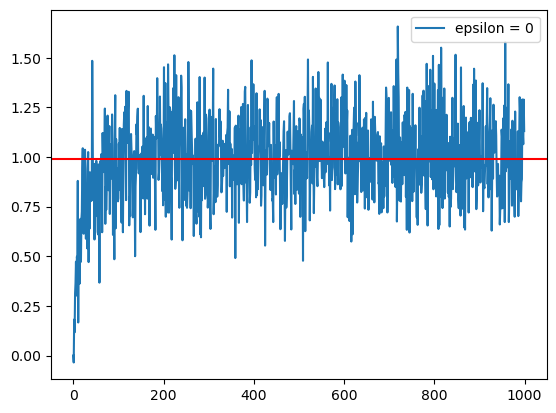

0.9880080464133167


In [23]:
average_reward_plot(num_bandits = 10, num_steps = 1000, epsilon = [0])